In [1]:
# cargando las librerias
import numpy as np  # para trabajar con vectores
import pandas as pd  # para trabajar con dataframe
import seaborn as sns # para graficar los resultados
import matplotlib.pyplot as plt # para graficar los resultados
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  #IA  nos permite hacer los vectores
from sklearn.linear_model import LogisticRegression #para hacer la regresión lineal
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix # para el rendimiento del modelo
from sklearn.model_selection import train_test_split  # dividir los modelos entre set de entrenamiento y prueba

# para conectarse al drive a la base de datos limpios de Tomas

In [2]:
# esto es para conectarse a drive ya que aquí tengo la base de datos limpia, anteriormente trabajada de Tomas
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/hackathon/dataset_modelado_sentimiento.csv'
df = pd.read_csv(file_path)

print('CSV file loaded successfully. First 5 rows:')
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
CSV file loaded successfully. First 5 rows:
                                          clean_text  y
0  el fin de semana mi pareja y yo hicimos una re...  0
1  calefacción averiada o no operativa se comenta...  0
2  este hotel ha bajado notoriamente su categoria...  0
3  son pequeños se bloquean y son insuficientes p...  0
4  mal mal y mal una enorme diferencia de trato c...  0


In [3]:
df.head()

,clean_text,y
0,el fin de semana mi pareja y yo hicimos una re...,0
1,calefacción averiada o no operativa se comenta...,0
2,este hotel ha bajado notoriamente su categoria...,0
3,son pequeños se bloquean y son insuficientes p...,0
4,mal mal y mal una enorme diferencia de trato c...,0


# Tarea
Realizar una clasificación de sentimientos mediante un modelo de regresión logística en el DataFrame df después de aplicar la vectorización TF-IDF. Luego, evaluar el rendimiento del modelo mediante AUC-ROC, puntuación F1 y una matriz de confusión, y visualizar la distribución de la predicción.

## Aplicar vectorización TF-IDF

### Subtarea:
 TfidfVectorizer para transformar los textos de entrenamiento y prueba en una representación numérica (vectores TF-IDF).


**Razonamiento**:
El primer paso es dividir los datos en conjuntos de entrenamiento y prueba según las instrucciones, utilizando "clean_text" como característica e "y" como variable objetivo con un tamaño de prueba del 30 %.


In [4]:
X = df['clean_text']
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Data split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets.
X_train shape: (3738,)
X_test shape: (1603,)
y_train shape: (3738,)
y_test shape: (1603,)


**Razonamiento**:
Siguiendo las instrucciones, el siguiente paso es inicializar un objeto TfidfVectorizer.



In [5]:
vectorizer = TfidfVectorizer()
print("TfidfVectorizer initialized.")

TfidfVectorizer initialized.


**Razonamiento**:
El siguiente paso es ajustar el TfidfVectorizer a los datos de entrenamiento (X_train) y luego transformar tanto los datos de entrenamiento como los de prueba en vectores TF-IDF, según las instrucciones de la subtarea.


In [6]:
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
print("TF-IDF Vectorization applied to training and test sets.")
print(f"X_train_vec shape: {X_train_vec.shape}")
print(f"X_test_vec shape: {X_test_vec.shape}")

TF-IDF Vectorization applied to training and test sets.
X_train_vec shape: (3738, 16870)
X_test_vec shape: (1603, 16870)


## Entrenar el Modelo de Regresión Logística

### Subtarea:
Entrenar un modelo de Regresión Logística usando los vectores TF-IDF del conjunto de entrenamiento y las etiquetas correspondientes.


**Razonamiento**:
La subtarea requiere entrenar un modelo de regresión logística. El primer paso es instanciar el modelo. Este paso no requiere una declaración de importación explícita, ya que `LogisticRegression` ya se importó en la celda de configuración inicial (BhGX_27G8K0N).



In [7]:
model = LogisticRegression(solver='liblinear', random_state=42)
print("LogisticRegression model instantiated.")

LogisticRegression model instantiated.


**Razonamiento**:
La subtarea requiere entrenar el modelo de regresión logística. Una vez instanciado el modelo, el siguiente paso es ajustarlo a los datos de entrenamiento (`X_train_vec` e `y_train`) según las instrucciones.


In [8]:
model.fit(X_train_vec, y_train)
print("LogisticRegression model trained on X_train_vec and y_train.")

LogisticRegression model trained on X_train_vec and y_train.


## Evaluar el Rendimiento del Modelo

### Subtarea:
Calcular y mostrar las métricas de rendimiento del modelo, como el AUC-ROC, F1-score y la matriz de confusión, en el conjunto de prueba.


**Razonamiento**:
Siguiendo las instrucciones, el siguiente paso es predecir las probabilidades y las etiquetas de clase en el conjunto de prueba utilizando el modelo entrenado. Luego, calcular e imprimir la puntuación AUC-ROC, la puntuación F1 y la matriz de confusión.



In [9]:
y_pred_proba = model.predict_proba(X_test_vec)[:, 1]
y_pred = model.predict(X_test_vec)

auc_roc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"AUC-ROC Score: {auc_roc:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:\n", conf_matrix)

AUC-ROC Score: 0.9949
F1-Score: 0.9626
Confusion Matrix:
 [[798  24]
 [ 34 747]]


## Predecir y Visualizar los Resultados

### Subtarea:
Utilizar el modelo entrenado para predecir el sentimiento de los textos de prueba y visualizar la distribución de las predicciones, añadiendo leyendas a la visualización.


**Razonamiento**:
La subtarea requiere visualizar la distribución de las probabilidades predichas. Crear un histograma de `y_pred_proba` con las etiquetas y el título adecuados cumplirá con este requisito.


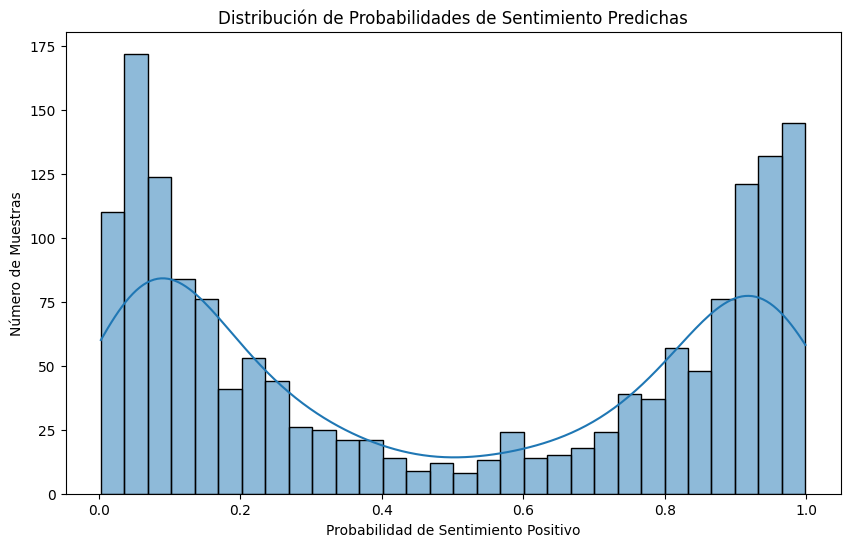

Histograma de probabilidades predichas mostradas


In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_proba, bins=30, kde=True)
plt.xlabel('Probabilidad de Sentimiento Positivo')
plt.ylabel('Número de Muestras')
plt.title('Distribución de Probabilidades de Sentimiento Predichas')
plt.show()
print("Histograma de probabilidades predichas mostradas")

## Probar el Modelo con un Comentario Personalizado

### Subtarea:
Ingresar un comentario de texto para ver la predicción de sentimiento del modelo entrenado.

#Pueba con opinión positiva

In [11]:
# Introduce tu comentario aquí para probar el modelo
custom_comment = "El servicio fue excelente y la comida deliciosa, ¡volveré pronto!"

# Vectorizar el comentario personalizado usando el mismo vectorizador entrenado
custom_comment_vec = vectorizer.transform([custom_comment])

# Predecir la probabilidad de sentimiento positivo
custom_comment_pred_proba = model.predict_proba(custom_comment_vec)[:, 1]

# Predecir la clase (0 para negativo, 1 para positivo)
custom_comment_pred = model.predict(custom_comment_vec)

print(f"Comentario: '{custom_comment}'")
print(f"Probabilidad de Sentimiento Positivo: {custom_comment_pred_proba[0]:.4f}")
if custom_comment_pred[0] == 1:
    print("Clasificación: Sentimiento Positivo")
else:
    print("Clasificación: Sentimiento Negativo")

Comentario: 'El servicio fue excelente y la comida deliciosa, ¡volveré pronto!'
Probabilidad de Sentimiento Positivo: 0.7877
Clasificación: Sentimiento Positivo


#Prueba opinión negativa

In [12]:
# Introduce tu comentario aquí para probar el modelo
custom_comment = "El servicio fue pesimo y la comida malisima,¡no volveria!"

# Vectorizar el comentario personalizado usando el mismo vectorizador entrenado
custom_comment_vec = vectorizer.transform([custom_comment])

# Predecir la probabilidad de sentimiento positivo
custom_comment_pred_proba = model.predict_proba(custom_comment_vec)[:, 1]

# Predecir la clase (0 para negativo, 1 para positivo)
custom_comment_pred = model.predict(custom_comment_vec)

print(f"Comentario: '{custom_comment}'")
print(f"Probabilidad de Sentimiento Positivo: {custom_comment_pred_proba[0]:.4f}")
if custom_comment_pred[0] == 1:
    print("Clasificación: Sentimiento Positivo")
else:
    print("Clasificación: Sentimiento Negativo")

Comentario: 'El servicio fue pesimo y la comida malisima,¡no volveria!'
Probabilidad de Sentimiento Positivo: 0.2757
Clasificación: Sentimiento Negativo


## Tarea final

### Subtarea:
Resumir el proceso de transformación de texto y clasificación de sentimiento, destacando los resultados clave.


## Resumen:

### Hallazgos Clave del Análisis de Datos

* El conjunto de datos inicial se dividió correctamente en conjuntos de entrenamiento (3738 muestras) y de prueba (1603 muestras).
* La vectorización TF-IDF transformó los datos de texto en representaciones numéricas, lo que resultó en un vocabulario de 16870 términos únicos.
* Se entrenó correctamente un modelo de regresión logística con los datos de entrenamiento vectorizados TF-IDF.
* El modelo demostró un excelente rendimiento en el conjunto de prueba:
* Una **puntuación AUC-ROC de 0,9949**, lo que indica un alto poder discriminativo.
* Una **puntuación F1 de 0,9626**, lo que sugiere un rendimiento equilibrado entre precisión y recuperación.
* La **Matriz de Confusión** `[[798 24], [34 747]]` mostró:
* 798 verdaderos negativos (sentimientos negativos correctamente identificados).
* 747 verdaderos positivos (sentimientos positivos correctamente identificados).

* Solo se registraron 24 falsos positivos y 34 falsos negativos, lo que indica muy pocas clasificaciones erróneas.
* Se visualizó la distribución de las probabilidades predichas para el sentimiento positivo, mostrando una clara separación, en consonancia con las métricas de alto rendimiento.

### Perspectivas o próximos pasos

* El modelo de regresión logística, combinado con TF-IDF, es muy eficaz para esta tarea de clasificación de sentimientos, logrando un rendimiento casi perfecto. Este robusto modelo puede implementarse con confianza para el análisis de sentimientos.
* Un análisis más profundo podría implicar la investigación de las características (términos TF-IDF) que más contribuyen a las predicciones de sentimientos positivos y negativos del modelo para obtener información más detallada sobre cada dominio.